# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

*** I did questions 1 and 2 (well at least tried 2) ***

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

## 1.1

In [ ]:
# Load the Q1_clean data csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

q1_clean = pd.read_csv('Q1_clean.csv')
q1_clean.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [ ]:
# Clean/strip white spaces from columns

q1_clean.columns = q1_clean.columns.str.strip()

In [ ]:
# Compute the average prices and scores by Neighbourhood;
# which bourough is the most expensive on average?

q1_clean.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean()

# Manhattan is the most expensive, with an average of $183 a night

,Price,Review Scores Rating
Neighbourhood,,
Bronx,75.276498,91.654378
Brooklyn,127.747378,92.363497
Manhattan,183.664286,91.801496
Queens,96.857233,91.549057
Staten Island,146.166667,90.843750


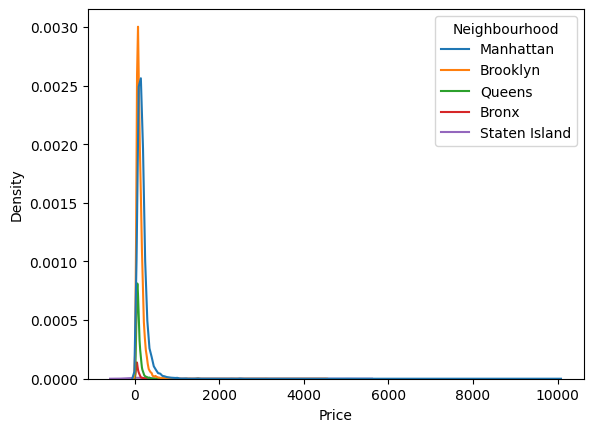

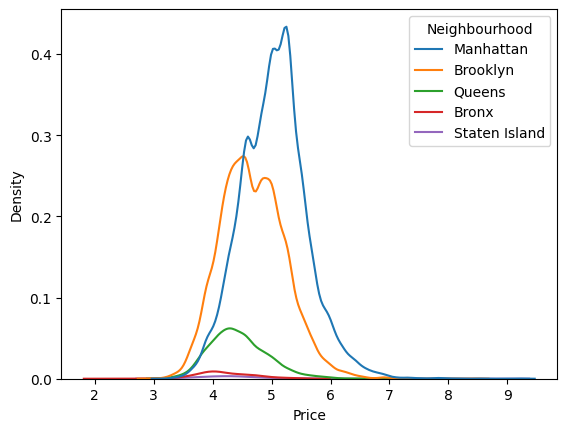

In [ ]:
# Create a kernel density plot of price and log price, grouping by Neighbourhood.

sns.kdeplot(x=q1_clean['Price'], hue=q1_clean['Neighbourhood'])
plt.show()

sns.kdeplot(x=np.log(q1_clean['Price']), hue=q1_clean['Neighbourhood'])
plt.show()

## 1.2

In [ ]:
# Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables,
# without an intercept in the linear model and using all the data.

from sklearn import linear_model

y = q1_clean['Price']
X = pd.get_dummies(q1_clean['Neighbourhood'], dtype='int')

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


In [ ]:
# Compare the coefficients in the regression to the table from part 1.
# What pattern do you see?
# What are the coefficients in a regression of a continuous variable on one categorical variable?

# The coefficients for the neighbourbood dummy regression are the same as the means calculated in part 1
# Therefore the regression is really just taking the average for the price variable
# of the group / neighbourhood

## 1.3

In [ ]:
# Repeat part 2, but leave an intercept in the linear model.
# How do you have to handle the creation of the dummies differently?

y = q1_clean['Price']
X = pd.get_dummies(q1_clean['Neighbourhood'], dtype='int', drop_first = True)

reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [ ]:
# What is the intercept?

print(reg.intercept_)

75.27649769585331


In [ ]:
# One-hot encoding/dummy variables

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_+reg.intercept_})
results

,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


In [ ]:
# Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

# Leaving an intercept in the linear model resulted in it dropping the Bronx data point
# The Bronx is now what is considered the reference group, and the coefficient found in parts
# 1 and 2 now becomes the intercept (found above)
# Now coefficients in part 3 are relative to the value of 75 found for the Bronx
# (75 + part 3 table variables = values in part 1 and 2 tables)

## 1.4

In [ ]:
# Split the sample 80/20 into a training and a test set.

from sklearn.model_selection import train_test_split

y = q1_clean['Price']
X = q1_clean.loc[:,['Review Scores Rating', 'Neighbourhood'] ]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood'], dtype='int')], axis=1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood'], dtype='int')], axis=1)

In [ ]:
# Run a regression of Price on Review Scores Rating and Neighbourhood.

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

In [ ]:
# What is the  𝑅2  and RMSE on the test set?

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


In [ ]:
# What is the coefficient on Review Scores Rating?

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [ ]:
# What is the most expensive kind of property you can rent? (table above)

# Manhattan for about $192 a night
# 100*1.032257 + 89.4 = 192

## 1.5

In [ ]:
# Split the sample 80/20 into a training and a test set.

y = q1_clean['Price']
X = q1_clean.loc[:,['Review Scores Rating', 'Neighbourhood', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood'], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')], axis = 1)

Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood'], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')], axis = 1)

In [ ]:
# Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type.

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

In [ ]:
# What is the  𝑅2  and RMSE on the test set?

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


In [ ]:
# What is the coefficient on Review Scores Rating?

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


In [ ]:
# What is the most expensive kind of property you can rent?

# A 100-rated entire home/apt in Manhattan for: 110.617+53.69+(100*.0626) = $170.57

## 1.6

In [ ]:
# What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5?
# Hint: Think about how multilple linear regression works.

# The coefficient on rating shrinks because in part 5 we control for room type,
# and the other variables become less powerful predictors.

## 1.7 (optional) - skipped

In [ ]:
# N/A

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

## 2.1

In [39]:
# Download cars_hw.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cars = pd.read_csv('cars_hw.csv')
cars.head()

# Save orignial for a few plots (?)
cars0 = cars

In [40]:
# EDA of cars_hw.csv

print(cars.columns)
print(cars.shape)

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')
(976, 12)


In [41]:
# Cleaning cars_hw.csv

cars['age'] = max(cars['Make_Year']) - cars['Make_Year']

In [42]:
# Cleaning cars_hw.csv

cars['price_ihs'] = np.arcsinh(cars['Price'])
cars['mileage_ihs'] = np.arcsinh(cars['Mileage_Run'])

In [43]:
# Cleaning cars_hw.csv

cars = cars.drop(['Price', 'Mileage_Run', 'Make_Year', 'Unnamed: 0'], axis=1)

In [44]:
print(cars.columns)

Index(['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Seating_Capacity',
       'Fuel_Type', 'Transmission', 'Transmission_Type', 'age', 'price_ihs',
       'mileage_ihs'],
      dtype='object')


## 2.2

<Axes: xlabel='Price', ylabel='Density'>

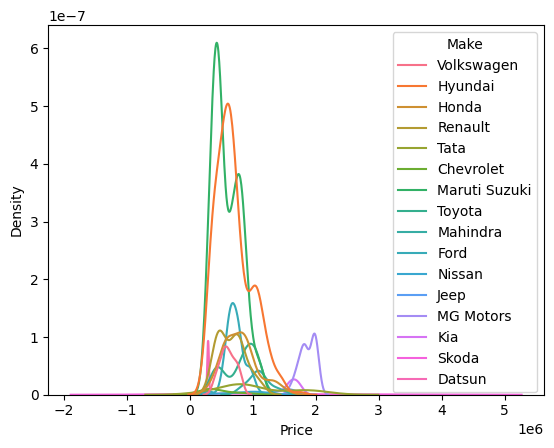

In [45]:
# Summarize the Price variable and create a kernel density plot.

sns.kdeplot(data = cars0, x='Price',hue='Make')

In [46]:
# Use .groupby() and .describe() to summarize prices by brand (Make).

cars0['Price'].groupby(cars0['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


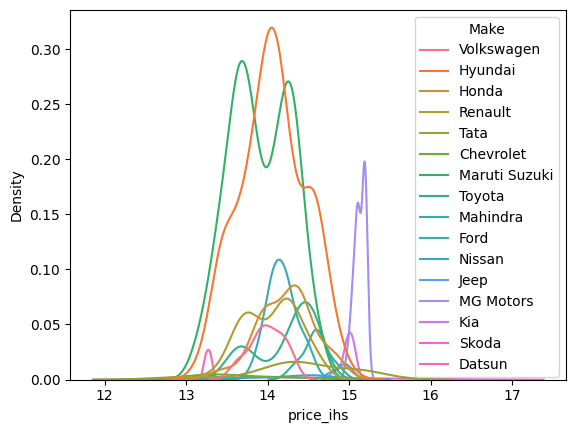

In [47]:
# Make a grouped kernel density plot by Make.

sns.kdeplot(data=cars,x='price_ihs',hue='Make')
cars['price_ihs'].groupby(cars['Make']).describe()

In [23]:
# Which car brands are the most expensive?

# (Based on key) Most expensive are MG Motors, Kia, then Jeep, however I had a
# hard time interpretting and understanding this part of the question

# What do prices look like in general?

# Prices range from 188,000 for a cheap Tata to 2,941,000 for an expensive Skoda

## 2.3

In [48]:
# Split the data into an 80% training set and a 20% testing set

# Randomize rows
N = cars.shape[0]
df = cars.sample(frac=1, random_state=50)
train_size = int(.8*N)

# Train test split
df_train = cars[0:train_size]
y_train = df_train['price_ihs']

df_test = cars[train_size:]
y_test = df_test['price_ihs']

## 2.4

In [49]:
# Make a model where you regress price on the numeric variables alone;

from sklearn import linear_model

var_n = ['age','mileage_ihs','Seating_Capacity'] # Select variables
X_train_n = df_train.loc[:,var_n] # Process training covariates
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train) # Run regression
X_test_n = df_test.loc[:,var_n] # Process test covariates
y_hat = reg_n.predict(X_test_n)

In [50]:
# what is the  𝑅2  and RMSE on the training set and test set?

print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test))
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n)

Numeric only Rsq:  0.32815113492174
Numeric only RMSE:  0.3167421526420371


In [51]:
# Make a second model where, for the categorical variables,
# you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies();
# be careful of the dummy variable trap);

var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']

dummies = pd.DataFrame([])
for var in var_cat:
    new_dummies = pd.get_dummies( cars.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]

reg_c = linear_model.LinearRegression().fit(X_train_c,y_train)
y_hat_c = reg_c.predict(X_test_c)

In [52]:
# what is the  𝑅2  and RMSE on the test set?
# Which model performs better on the test set?

print('Categorical only Rsq: ', reg_c.score(X_test_c,y_test))
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c)

# This model performed better than the numeric one

Categorical only Rsq:  0.4930705586241687
Categorical only RMSE:  0.27513372460312613


In [53]:
# Make a third model that combines all the regressors from the previous two;

X_train_all = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
y_hat_all = reg_all.predict(X_test_all)

In [54]:
# what is the  𝑅2  and RMSE on the test set?

print('All Rsq: ', reg_all.score(X_test_all,y_test))
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all)

# Does the joint model perform better or worse, and by home much?

# This model perfroms the best with RSQ = 0.715 (this is 0.22 higher than categorical only model above)
# as well as a RMSE of 0.2006 (which is lower than the previous 2 models by some tenths)
# Expanding the set of features improved the performance of the model.

All Rsq:  0.7158756511584288
All RMSE:  0.20597964092238044


## 2.5

In [55]:
# Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression.
# As you increase the degree of the expansion, how do the  𝑅2  and RMSE change?
# At what point does  𝑅2  go negative on the test set?

from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)

    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out()
    X_test_d = pd.DataFrame(data=Z, columns = names)
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out()
    X_train_d = pd.DataFrame(data=Z, columns = names)
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)

    # Reset indices for concatenating:
    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)


    # Regression metrics:
    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)

    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test))
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all)

1  Rsq:  0.7158756511584288
1 RMSE:  0.20597964092238044
2  Rsq:  0.742856723078805
2 RMSE:  0.19595558999471444
3  Rsq:  0.660759840813532
3 RMSE:  0.2250731552078457
4  Rsq:  -1.2959956802846589e+17
4 RMSE:  139114323.1296497


In [ ]:
# For your best model with expanded features, what is the  𝑅2  and RMSE?
# How does it compare to your best model from part 4?

# So the best degree is 2: An Rsq of .74 and a RMSE of .196.
# After that, performance falls, with a negative Rsq for degree=4.
# Got lost with this question, specifically why the indices had to be reset for concatenating (?)

## 2.6

<Axes: xlabel='price_ihs'>

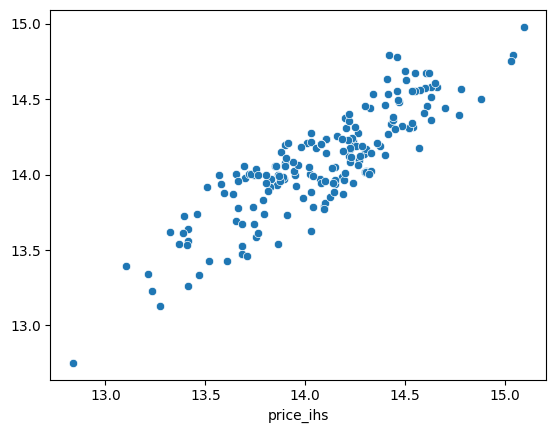

In [57]:
# For your best model so far, determine the predicted values for the test data and plot them against the true values.
# Do the predicted values and true values roughly line up along the diagonal, or not?
# Compute the residuals/errors for the test data and create a kernel density plot.

# Code from previous question
d = 2

expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out()
X_test_d = pd.DataFrame(data=Z, columns = names)

Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out()
X_train_d = pd.DataFrame(data=Z, columns = names)

X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)

X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)

y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all

# Scatterplot:
sns.scatterplot(x=y_test,y=y_hat_all)

# Values line up pretty strongly correlated along the diagonal

<Axes: xlabel='price_ihs', ylabel='Density'>

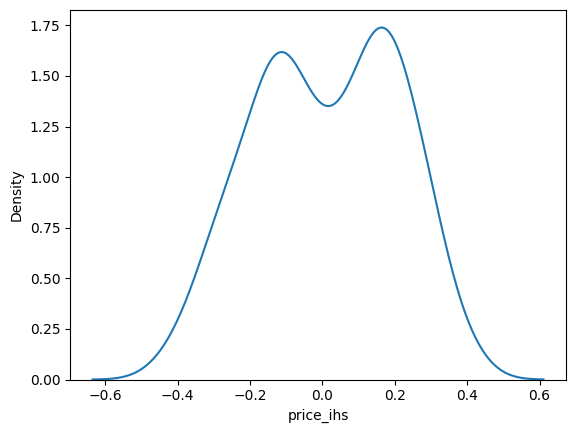

In [58]:
sns.kdeplot(residuals)

In [59]:
# Do the residuals look roughly bell-shaped around zero?
# Evaluate the strengths and weaknesses of your model.

# Also had a hard time understanding this part of the question

from sklearn import tree

X_train_n.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_n, X_train_c],axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
X_test_n.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

sup_depth = 20
for d in np.arange(2,sup_depth):
    model = tree.DecisionTreeRegressor(max_depth=d)
    cart = model.fit(X_train_all, y_train)
    cart.score(X_test_all,y_test)
    y_hat = cart.predict(X_test_all)
    rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
    print('Depth: ', d, ', RMSE: ', rmse, ', Rsq: ', cart.score(X_test_all,y_test))

Depth:  2 , RMSE:  0.2941470673354058 , Rsq:  0.4205861053784097
Depth:  3 , RMSE:  0.2871760925440431 , Rsq:  0.4477236779447896
Depth:  4 , RMSE:  0.28494571442750416 , Rsq:  0.45626896894956126
Depth:  5 , RMSE:  0.28485272189518684 , Rsq:  0.4566238061853406
Depth:  6 , RMSE:  0.2687842525212371 , Rsq:  0.5161981758513323
Depth:  7 , RMSE:  0.25228573777725155 , Rsq:  0.5737687778795644
Depth:  8 , RMSE:  0.2509069960064842 , Rsq:  0.5784147559382811
Depth:  9 , RMSE:  0.25236174813546947 , Rsq:  0.5735119035218994
Depth:  10 , RMSE:  0.25752070116850545 , Rsq:  0.555896544566234
Depth:  11 , RMSE:  0.2560832081344073 , Rsq:  0.5608407206504213
Depth:  12 , RMSE:  0.25268132382868014 , Rsq:  0.5724310620067843
Depth:  13 , RMSE:  0.2593609721358014 , Rsq:  0.5495266423061604
Depth:  14 , RMSE:  0.2646537709473869 , Rsq:  0.5309533560614831
Depth:  15 , RMSE:  0.26825151348092147 , Rsq:  0.5181140968361229
Depth:  16 , RMSE:  0.2732945582007313 , Rsq:  0.49982517561673956
Depth:  17

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?